# Basic Operations with Tensorflow

## Indicações

### Mensagem
* Quem deseja participar na tradução deste tutorial, pode-me enviar um email a **jlasam001@gmail.com** informando sua disponibilidade para a tarefa de tradução. Cabe indicar que o aluno participante da tradução do documento ganhara 1 ponto extra.

### Dicas execução
* Carregue todos os pacotes que serão necessários no início do arquivo.
* Entre um exercício e outro, utilize um grafo diferente ou então reínicie o grafo padrão.
* Para executar comandos da shell dentro do notebook, utilize o prefixo `!` antes do comando de shell. (e.g. para listar os arquivos da pasta atual faça `! ls` para UNIX ou `! dir` para Windows.

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Data	Flow	Graphs


A	machine	learning	application	is the	result	of	the	repeated	computation	of complex	mathematical	expressions.	

In	TensorFlow,	a	computation	is	described using	the	Data	Flow	Graph,	where	
* each	**node**	in	the	graph	represents	the	instance of	a	mathematical	operation	(multiply,	add,	divide,	and	so	on);
* each	**edge** is	a	multi-dimensional	data	set	(tensors)	on	which	the	operations	are	performed.

TensorFlow	supports	these	constructs	and	these	operators.	Let's	see	in	detail	how nodes	and	edges	are	managed by	TensorFlow:
* **Node**:	In	TensorFlow,	each	node	represents	the	instantion	of	an	operation. Each	operation	has	>=	inputs	and	>=	0	outputs.
* **Edges**:	In	TensorFlow,	there	are	two	types	of	edge:
  * **Normal	Edges**:	They	are	carriers	of	data	structures	(tensors),	where	an output	of	one	operation	(from	one	node)	becomes	the	input	for	another operation.
  * **Special	Edges**:	These	edges	are	not	data	carriers	between	the	output	of a	node	(operator)	and	the	input	of	another	node.	
    * A	special	edge indicates	a	control	dependency	between	two	nodes.	Let's	suppose	we have	two	nodes	A	and	B	and	a	special	edges	connecting	A	to	B;	it means	that	B	will	start	its	operation	only	when	the	operation	in	A	ends. 
  * **Special	edges	are	used	in	Data	Flow	Graph	to set	the	happens-before relationship	between	operations	on	the	tensors**.

Let's	explore	some	features	in	Data	Flow	Graph	in	greater	detail:

* **Operation**:	This	represents	an	abstract	computation,	such	as	adding	or multiplying	matrices.	An	operation	manages	tensors.	It	can	just	be **polymorphic**,	the	same	operation	can	manipulate	different	tensor	element types.	For	example,	the	addition	of	two	int32	tensors,	the	addition	of	two float	tensors,	and	so	on.
* **Kernel**:	This	represents	the	concrete	implementation	of	that	operation.	**A kernel	defines	the	implementation	of	the	operation	on	a	particular	device**.	For example,	an	add	matrix	operation	can	have	a	CPU	implementation	and	a	GPU one.	

In	the	following	section,	we	have	introduced	the	concept	of	**sessions**	to create	a	del	execution	graph	in TensorFlow.	Let's	explain	this	topic:

* **Session**:	When	the	client	program	has	to	establish	communication	with the TensorFlow	runtime	system,	a	session	must	be	created.	As	soon	as	the session	is	created	for	a	client,	an	initial	graph	is	created	and	is	empty.	It	has two	fundamental	methods:
  * **session.extend**:	In	a	computation,	the	user	can	extend	the	execution graph,	requesting	to	add	more	operations	(nodes)	and	edges	(data).
  * **session.run**:	Using	TensorFlow,	sessions	are	created	with	some graphs,	and	these	full	graphs	are	executed	to	get	some	outputs,	or sometimes,	subgraphs	are	executed	thousands/millions	of	times	using run	invocations.	
    * **Basically,	the	method	runs	the	execution	graph	to provide	outputs.**

## 	Doing	Math	with TensorFlow	

### The	tensor	data	structure
Tensors	are	the	basic	data	structures	in	TensorFlow.	As	we	have	already	said, they	represent	the	connecting	edges	in	a	Data	Flow	Graph.	

A	tensor	simply identifies	a	multidimensional	array	or	list.

It	can	be	identified	by	three	parameters:	`rank`,	`shape`,	and	`type`:
* `rank`:	Each	tensor	is	described	by	a	unit	of	dimensionality	called	`rank`.	It identifies	the	number	of	dimensions	of	the	tensor.	For	this	reason,	a	`rank`	is known	as	order	or	$n$-dimensions	of	a	tensor	(for	example,	a	rank	$2$	tensor	is	a matrix	and	a	rank	$1$	tensor	is	a	vector).
* `shape`:	The	shape	of	a	tensor	is	the	number	of	rows	and	columns	it	has.
* `type`:	It	is	the	data	type	assigned	to	the	tensor's	elements.

Well,	now	we	take	confidence	with	this	fundamental	data	structure.	To	build	a tensor,	we	can:
* Build	an	$n$-dimensional	array;	for	example,	by	using	the	NumPy	library.
* Convert	the	$n$-dimensional	array	into	a	TensorFlow	tensor.
* Once	we	obtain	the	tensor,	we	can	handle	it	using	the	TensorFlow	operators.

### One-dimensional	tensors
To	build	a	one-dimensional	tensor,	we	use	the	Numpy	`array(s)`	command,	where	`s` is	a	Python	list:

In [2]:
tensor_1d	=	np.array([1.3,	1,	4.0,	23.99])
print(tensor_1d)	
# print	the	basic	attributes	of	the	tensor,	the	rank	of	the	tensor:
print('dimension = ',tensor_1d.ndim)	
print('type = ',tensor_1d.dtype)
print('shape = ',tensor_1d.shape)

[ 1.3   1.    4.   23.99]
('dimension = ', 1)
('type = ', dtype('float64'))
('shape = ', (4,))


Now,	let's	see	how	to	convert	a	NumPy	array	into	a	TensorFlow	tensor, using the	TensorFlow	function	`tf_convert_to_tensor` that	converts	Python	objects	of various	types	to	tensor	objects.	


In [5]:
tf_tensor=tf.convert_to_tensor(tensor_1d,dtype=tf.float64)

#Running	the	Session,	we	can	visualize	the	tensor	and	its	elements	as	follows:
with	tf.Session()	as	sess:	
  print	sess.run(tf_tensor)	
  print	sess.run(tf_tensor[0])	
  print	sess.run(tf_tensor[2])

[ 1.3   1.    4.   23.99]
1.3
4.0


### Two-dimensional	tensors

To	create	a	two-dimensional	tensor	or	matrix,	we	again	use	`array(s)`,	but	`s`	will	be a	sequence	of	array:

In [7]:
tensor_2d=np.array([(1,2,3,4),(4,5,6,7),(8,9,10,11),(12,13,14,15)])	
print(tensor_2d)


[[ 1  2  3  4]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


Let's	see	how	we	can	apply	a	little	more	complex	operations	to	these	data structures.	Consider	the	following	code:

In [10]:
matrix1	=	np.array([(2,2,2),(2,2,2),(2,2,2)], dtype='int32')	
matrix2	=	np.array([(1,1,1),(1,1,1),(1,1,1)], dtype='int32')
matrix3	=	np.array([(2,7,2),(1,4,2),(9,0,2)],dtype='float32')	
print("matrix1 = ",matrix1)
print("matrix2 = ",matrix2)
print("matrix3 = ",matrix3)

# We	used	the	TensorFlow	constant	operator	to	transfor	numpy array into	a	tensor	data	structure:

matrix1	=	tf.constant(matrix1)	
matrix2	=	tf.constant(matrix2)
matrix3	=	tf.constant(matrix3)
  
#The	matrices	are	ready	to	be	manipulated	with	TensorFlow	operators.	
#In	this case,	we	calculate	a	matrix	multiplication	and	a	matrix	sum:

matrix_product	=	tf.matmul(matrix1,	matrix2)	
matrix_sum	    =	tf.add(matrix1,matrix2)	
matrix_det	    =	tf.matrix_determinant(matrix3)

#It's	time	to	create	our	graph	and	run	the	session,	with	the	tensors	and operators	created:

with	tf.Session()	as	sess:	
  result1	=	sess.run(matrix_product)	
  result2	=	sess.run(matrix_sum)	
  result3	=	sess.run(matrix_det)
  print("matrix1*matrix2	= ",result1)
  print("matrix1+matrix2	= ",result2)
  print("|mmatrix3|	= ",result3)

('matrix1 = ', array([[2, 2, 2],
       [2, 2, 2],
       [2, 2, 2]], dtype=int32))
('matrix2 = ', array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=int32))
('matrix3 = ', array([[2., 7., 2.],
       [1., 4., 2.],
       [9., 0., 2.]], dtype=float32))
('matrix1*matrix2\t= ', array([[6, 6, 6],
       [6, 6, 6],
       [6, 6, 6]], dtype=int32))
('matrix1+matrix2\t= ', array([[3, 3, 3],
       [3, 3, 3],
       [3, 3, 3]], dtype=int32))
('|mmatrix3|\t= ', 56.00002)


### Three-dimensional	tensors

The	following	code	build	a	three-dimensional	tensor:

In [11]:
tensor_3d	=	np.array([[[1,2],[3,4]],[[5,6],[7,8]]])	
print(tensor_3d)	
# print	the	basic	attributes	of	the	tensor,	the	rank	of	the	tensor:
print('dimension = ',tensor_3d.ndim)	
print('type = ',tensor_3d.dtype)
print('shape = ',tensor_3d.shape)

[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]
('dimension = ', 3)
('type = ', dtype('int64'))
('shape = ', (2, 2, 2))


## Computing	gradients

TensorFlow	has	functions	to	solve	other	more	complex	tasks.	
For	example,	we will	use	a	mathematical	operator	that	calculates	the	derivative	of	$y$	with	respect	to its	expression $x$	parameter.
For	this	purpose,	we	use	the	`tf.gradients()` function.

Let	us	consider	the	math	function	$y	=	2x^2$.	
We want to compute the	gradient	$dy/dx$.	
The	following	is	the	code	to	compute	this	gradient:

In [3]:
#The	x	variable	is	the	independent	variable	of	the	function:
x	=	tf.placeholder(tf.float32)

#Let's	build	the	function:
y	=		2*x*x

#Finally,	we	call	the	tf.gradients()	function	with	y	and	x	as	arguments:
var_grad	=	tf.gradients(y,	x)

#To	evaluate	the	gradient,	we	must	build	a	session:
with	tf.Session()	as	sess:
  #The	gradient	will	be	evaluated	on	the	variable	x=1:
  var_grad_val	=	sess.run(var_grad,feed_dict={x:1})
  #The	var_grad_val	value	is	the	feed	result,	to	be	printed:
  print(var_grad_val)

[4.0]


## Random	numbers

The	generation	of	random	numbers	is	essential	in	machine	learning	and	within	the training	algorithms.	
When	random	numbers	are	generated	by	a	computer,	they	are generated	by	a	**Pseudo	Random	Number	Generator	(PRNG)**.	
The	term	pseudo comes	from	the	fact	that	the	computer	is	a	stain	logically	programmed	running	of instructions	that	can	only	simulate	randomness.	
Despite	this	logical	limitation, computers	are	very	efficient	at	generating	random	numbers.	
TensorFlow	provides operators	to	create	random	tensors	with	different	distributions.

### Uniform distribution

Generally, when we need to work with random numbers, we try to get repeated values with the same frequency, uniformly distributed. 
The operator TensorFlow provides values between `minval` and `maxval`, all with the same probability. 

`random_uniform(shape,minval,maxval,dtype,seed,name)`

Let's see a simple example code:

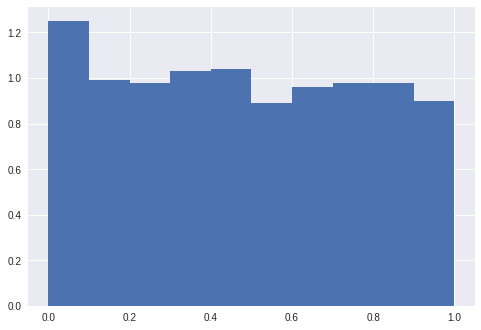

In [7]:
#The uniform variable is a 1-dimensional tensor, the elements 100, containing
#values ranging from 0 to 1, distributed with the same probability:
numberSamples = 1000
uniform = tf.random_uniform([numberSamples],minval=0,maxval=1,dtype=tf.float32) 
with tf.Session() as sess: 
    val = sess.run(uniform)
    #print(val)
    plt.hist(val,normed=True) 
    plt.show()

### Normal distribution

In some specific cases, you may need to generate random numbers that differ by a few units. 
In this case, we used the normal distribution of random numbers, also called Gaussian distribution, that increases the probability of the next issues extraction at 0. 
Each integer represents the standard deviation. As shown from the future issues to the margins of the range have a very low chance of being extracted. 
The following is the implementation with TensorFlow:

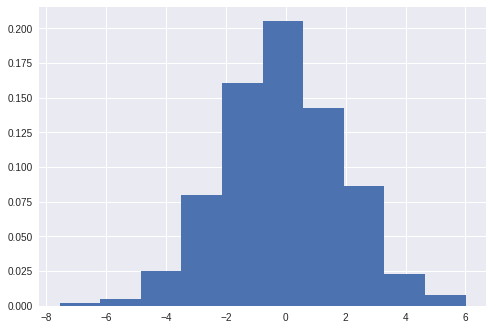

In [20]:
#We created a 1d-tensor of shape [100] consisting of random normal values,
#with mean equal to 0 and standard deviation equal to 2
numberSamples = 1000
norm	=	tf.random_normal([numberSamples],	mean=0,	stddev=2)
with tf.Session() as sess: 
  val = sess.run(norm)
  #print(val)
  plt.hist(val,normed=True) 
  plt.show()

### Generating random numbers with seeds

We recall that our sequence is pseudo-random, because the values are calculated using a deterministic algorithm and probability plays no real role. 
**The seed is just a starting point for the sequence and if you start from the same seed you will end up with the same sequence**. 
This is very useful, for example, to debug your code, when you are searching for an error in a program and you must be able to reproduce the problem because every run would be different.
Consider the following example where we have two uniform distributions:

In [24]:
#In the first uniform distribution, we began with the seed = 1. This means that
#repeatedly evaluating the two distributions, the first uniform distribution will
#always generate the same sequence of values:
  
uniform_with_seed = tf.random_uniform([1],seed=1)
uniform_without_seed = tf.random_uniform([1])

#As you can see, this is the end result. The uniform distribution with seed = 1
#always gives the same result:

print("First Run")
with tf.Session() as first_session:
	print('uniform with (seed = 1) = {}'.format(first_session.run(uniform_with_seed)))
	print("uniform with (seed = 1) = {}".format(first_session.run(uniform_with_seed)))
	print("uniform without seed = {}".format(first_session.run(uniform_without_seed)))
	print("uniform without seed = {}".format(first_session.run(uniform_without_seed)))

print("Second Run")
with tf.Session() as second_session:
	print("uniform with (seed = 1) = {}".format(second_session.run(uniform_with_seed)))
	print("uniform with (seed = 1) = {}".format(second_session.run(uniform_with_seed)))
	print("uniform without seed = {}".format(second_session.run(uniform_without_seed)))
	print("uniform without seed = {}".format(second_session.run(uniform_without_seed)))

First Run
uniform with (seed = 1) = [0.2390374]
uniform with (seed = 1) = [0.22267115]
uniform without seed = [0.49530184]
uniform without seed = [0.15070164]
Second Run
uniform with (seed = 1) = [0.2390374]
uniform with (seed = 1) = [0.22267115]
uniform without seed = [0.2640729]
uniform without seed = [0.51043105]


### Montecarlo's method

We end the section on random numbers with a simple note about the Montecarlo method. 
It is a numerical probabilistic method widely used in the application of high-performance scientific computing. 
In our example, we will calculate the value of $\pi$:

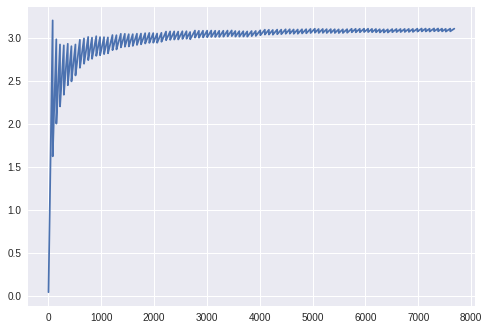

In [30]:
#Generate pseudo-random points inside the square [-1,1]×[-1,1], using the
#random_uniform function:

x = tf.random_uniform([1],minval=-1,maxval=1,dtype=tf.float32) 
y = tf.random_uniform([1],minval=-1,maxval=1,dtype=tf.float32) 
pi = []

#Inside the session, we calculate the value of π: the area of the circle is π and that
#of the square is 4. The relationship between the numbers inside the circle and the
#total of generated points must converge (very slowly) to π, and we count how
#many points fall inside the circle equation x^2+y^2=1.

trials = 100 
hits = 0
with tf.Session() as sess: 
	for i in range(1,trials):    
		for j in range(1,trials): 
			xv = sess.run(x)
			yv = sess.run(y)
			if(xv**2 + yv**2 < 1): 
				hits = hits + 1 
				pi.append((4 * float(hits) / i)/trials)    

plt.plot(pi) 
plt.show()

A partial differential equation (PDE) is a differential equation involving partial derivatives of an unknown function of several independent variables. 
PDEs are commonly used to formulate and solve major physical problems in various fields, from quantum mechanics to financial markets. 
In this section, we take the example from [link](https://www.TensorFlow.org/versions/r0.8/tutorials/pdes/index.html), showing the use of TensorFlow in a two-dimensional PDE solution that models the surface of square pond with a few raindrops landing on it. The effect will be to produce bi-dimensional waves on the pond itself. 
We won't concentrate on the computational aspects of the problem, as this is beyond the scope of this book; instead we will focus on using TensorFlow to define the problem.